# Modelos de Regresión Lineal
## 1. Modelos con datos simulados
* y = a + b * x

* x : 100 valores distribuidos segun una N(1.5, 2.5)

* Ye = 5 + 1.9 * x

* e estará distribuidida segun N(0,0.8)

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Ejemplo
w = np.random.randn(10)
print(w)

[-0.21226876  1.21888882  1.64373656  0.08215801  0.43581709 -0.19265369
 -1.18048948  1.59987246  0.63218752 -0.53025611]


In [3]:
x = 1.5 + 2.5*np.random.randn(100) #np.random.randn reproduce 100 
#valores siguiendo la distribucion normal
e = 0 + 0.9*np.random.randn(100)

In [4]:
y_pred = 5 + 1.9*x

In [5]:
y_act = 5 + 1.9*x + e

In [6]:
#Con estas instrucciones pasamos los valores a lista
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [7]:
#Pasamos los valores de als lista a un dataframe
data = pd.DataFrame({
    "X":x_list,
    "Y":y_act_list,
    "Y_pred":y_pred_list
})

In [8]:
data.head()

,X,Y,Y_pred
0,0.827330,7.500894,6.571927
1,0.040052,5.927190,5.076100
2,6.210777,16.237098,16.800476
3,1.775265,9.946543,8.373003
4,4.128282,11.758976,12.843737


In [9]:
import matplotlib.pyplot as plt #Libreria para graficar

In [10]:
y_mean = [np.mean(y_act) for i in range(1,len(x_list)+1)]

Text(0.5, 1.0, 'Valor Actual vs Predicción')

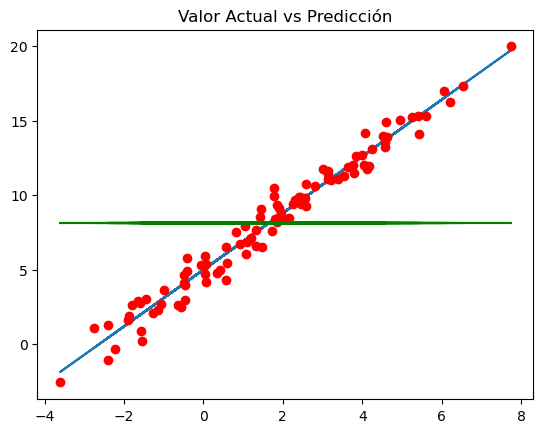

In [11]:
%matplotlib inline 
#El codigo anterior coloca todos los graficos en uno solo

plt.plot(x, y_pred) #Linea de la predicción
plt.plot(x, y_act, "ro") #Linea de los datos simulados
plt.plot(x, y_mean, "g") #Linea del promedio
plt.title("Valor Actual vs Predicción") #Titulo del gráfico

## ¿Como saber si la predicción de buena?

* SST : (Suma de los Cuadrados Totales) - Variabilidad de los datos con respecto al promedio. 

* SSD : (Suma de los Cuadrados de las Diferencias) -  Diferencia entre los datos originales y la predicción que el modelo no es capaz de explicar (errores que deberian seguir un distribución normal)

* SSR : (Suma de los Cuadrados de la Regresion) - Diferencia entre la regresión y el valor promedio. El modelo busca explicar

* SST = SSD + SSR

* R^2 = SSR / SST, coeficiente de determinación entre 0 y 1 

In [12]:
data["SSR"] = (data["Y_pred"] - np.mean(y_act))**2
data["SSD"] = (data["Y_pred"] - data["Y"])**2
data["SST"] = (data["Y"] - np.mean(y_act))**2

In [13]:
data.head()

,X,Y,Y_pred,SSR,SSD,SST
0,0.827330,7.500894,6.571927,2.482294,0.862979,0.418044
1,0.040052,5.927190,5.076100,9.433238,0.724354,4.929589
2,6.210777,16.237098,16.800476,74.874728,0.317395,65.442283
3,1.775265,9.946543,8.373003,0.050871,2.476027,3.236710
4,4.128282,11.758976,12.843737,22.055040,1.176706,13.043067


In [14]:
SSR = data["SSR"].sum()
SSD = data["SSD"].sum()
SST = data["SST"].sum()

In [15]:
SSR

2050.1733957195875

In [16]:
SSD

60.169746200677835

In [17]:
SST

2139.8881142553473

In [18]:
SSR+SSD

2110.343141920265

In [19]:
R2 = SSR/SST
R2

0.958075042364082

(array([ 1.,  3.,  8., 11., 18., 24., 13., 11.,  7.,  4.]),
 array([-2.09212576, -1.70255253, -1.3129793 , -0.92340607, -0.53383283,
        -0.1442596 ,  0.24531363,  0.63488686,  1.02446009,  1.41403333,
         1.80360656]),
 <BarContainer object of 10 artists>)

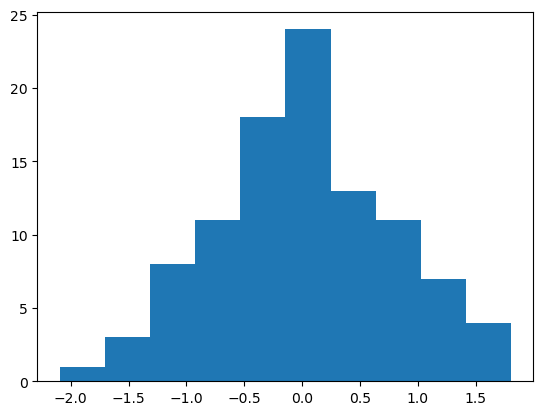

In [20]:
plt.hist(data["Y_pred"] - data["Y"]) #Graficando la distribución del error

### RECORDAR
### SST = SSR + SSD

## Obteniendo la recta de regresión lineal
* y = a + b * x
* b = sum((xi - x_m) * (yi - y_m))/sum(xi - x_m)^2
* a = y_m - b * x_m

In [21]:
x_mean = np.mean(data["X"])
y_mean = np.mean(data["Y"])

In [22]:
x_mean, y_mean 

(1.6568785170009621, 8.147457249769598)

In [23]:
data["beta_n"] = (data["X"] - x_mean)*(data["Y"] - y_mean) #Numerador Covarianza
data["beta_d"] = (data["X"] - x_mean)**2 #Denominador Varianza

In [24]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [25]:
alpha = y_mean - beta*x_mean

In [26]:
alpha,beta #Coeficiencientes de la ecuación lineal

(4.976704655772174, 1.9136904495186857)

El modelo lineal obtenido por regresión es:
y = 5.152171243504449 + 1.8785280311026924 * x

In [27]:
data["Y_model"] = alpha + beta*data["X"]

In [28]:
data.head()

,X,Y,Y_pred,SSR,SSD,SST,beta_n,beta_d,Y_model
0,0.827330,7.500894,6.571927,2.482294,0.862979,0.418044,0.536355,0.688150,6.559959
1,0.040052,5.927190,5.076100,9.433238,0.724354,4.929589,3.589787,2.614127,5.053353
2,6.210777,16.237098,16.800476,74.874728,0.317395,65.442283,36.839399,20.737988,16.862209
3,1.775265,9.946543,8.373003,0.050871,2.476027,3.236710,0.212987,0.014015,8.374012
4,4.128282,11.758976,12.843737,22.055040,1.176706,13.043067,8.925521,6.107837,12.876959


In [29]:
SSR = sum((data["Y_model"] - y_mean)**2) 
SSD = sum((data["Y_model"] - data["Y"])**2)
SST = sum((data["Y"] - y_mean)**2)

In [30]:
SSR, SSD, SST

(2079.824848915967, 60.06326533937926, 2139.888114255347)

In [31]:
R2 = SSR/SST

In [32]:
R2

0.9719315860772089

Text(0.5, 1.0, 'Valor Actual vs Predicción')

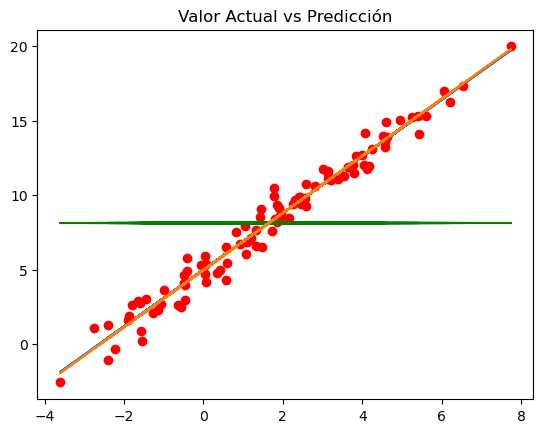

In [33]:
y_mean1 = [np.mean(data["Y"]) for i in range(1,len(data)+1)]

%matplotlib inline
plt.plot(data["X"], data["Y_pred"])
plt.plot(data["X"], data["Y"], "ro")
plt.plot(data["X"], y_mean1, "g")
plt.plot(data["X"], data["Y_model"])
plt.title("Valor Actual vs Predicción")

## Error estándar de los residuos (RSE)

* RSE es la desviación estándar del término del error (desviación de la parte de datos que el modelo no es capaz de explicar por falta de información o más datos adicionales)


* RSE = raiz(SSD/n-2) Para regresión lineal --> n : número de datos
* RSE = raiz(SSD/n-k-1) Para una regresión multiple --> n : número de datos,
  k : número de variables predictoras

In [34]:
RSE = np.sqrt(SSD/(len(data)-2))

In [35]:
RSE

0.7828732098154382

In [39]:
np.mean(data["Y"]) #Promedio de los valores reales, columna "Y"

8.147457249769598

In [44]:
error_porcentaje = (RSE/np.mean(data["Y"]))*100 #Porcentaje de error
error_porcentaje # RSE/promedio datos reales

9.608804143618881